## Announcements

* TODAY: Literature Review
* Next week: Midterm 1
* 2/10/17: Womework 1

# t-distributed stochastic neighbor embedding (t-SNE)

van der Maaten, L.J.P.; Hinton, G.E. (Nov 2008). "Visualizing High-Dimensional Data Using t-SNE" (PDF). Journal of Machine Learning Research. 9: 2579–2605.

* t-SNE is a nonlinear dimensionality reduction technique that is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized.
* t-SNE models each high-dimensional object by a lower-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points.

But first...

## Some Information Theory

* Consider a random variable $x$
* How much information is received when we observe a specific value for this variable?
  * If highly improbable event has just occurred, then we have received a lot of information
  * If we knew that the event was certain to happen we would receive very little information.
* Consider the probability distribution $p(x)$.
* We are looking for a quantity $h(x)$ that is a monotonic function of the probability $p(x)$ and that expresses the information content.
* What should we consider?
 * If we have two events x and y that are unrelated, then the information gain from observing both of them should be the sum of the information gained from each of them separately, so that h(x, y) = h(x) + h(y).
 * Two unrelated events will be statistically independent and so $p(x, y) = p(x)p(y)$.
\begin{equation}
h(x) = -\log_2p(x)
\end{equation}
* So what is the mean amount of information received when transmitting a random variable $x$?
\begin{equation}
H(x) = -\sum_xp(x)\log_2p(x)
\end{equation}
* $H(x)$ is called the _entropy_.

* Now, let's consider a continuous random variable, and $p(x)$ its probability density function.
* We can extend the definition of entropy by dividing $x$ into bins of width $\Delta$.
* The mean value theorem tells us that, for each such bin, there must exist a value $x_i$ such that
\begin{equation}
\int_{i\Delta}^{(i+a)\Delta} p(x)dx = p(x_i)\Delta
\end{equation}
* We can quantize $x$ by assigning it to the values $x_i$.
\begin{equation}
H(x)_\Delta = -\sum_ip(x_i)\Delta\log_2\left(p(x_i)\Delta\right) = -\sum_i p(x_i)\Delta\log_2p(x_i) - \log_2\Delta
\end{equation}
* Taking $\Delta\to 0$
\begin{equation}
\lim_{\Delta\to 0}H_\Delta = -\int p(x)\log_2p(x)dx - \lim_{\Delta\to 0}\left(\log_2\Delta\right)
\end{equation}
* The first term on the right is called the _differential entropy_, and the second term on the right diverges as $\Delta\to 0$.

**NOTE**: We have been measuring information using $\log_2$ (bits) but we can change to whatever logarithmic base and all the above holds. In particular, you can measure it using $\ln$ in which case the units are **nats** (natural unit of information).

## Kullback–Leibler divergence

*  Kullback–Leibler divergence (or the relative entropy) is a measure of how one probability distribution diverges from a second expected probability distribution.
* First, consider a discrete random variable $x$, and some unknown distribution $p(x)$ that we have modelled by some distribution $q(x)$.
* The additional amount of information required to specify $x$ by using $q(x)$ instead of $p(x)$ is 
\begin{eqnarray}
KL(p||q) & = & -\sum_ip(x_i)\ln q(x_i) - \left(-\sum_ip(x_i)\ln p(x_i)\right)\\
& = & \sum_ip(x_i)\ln \frac{p(x_i)}{q(x_i)}
\end{eqnarray}
* This is called the _relative entropy_ or _Kullback–Leibler divergence_, between distributions $p(x)$ and $q(x)$.
  * Only defined if $q(x_i)=0 \implies p(x_i)=0$, for all $i$ (absolute continuity).
  * $\lim_{p(x_i)\to 0} p(x_i)\log{p(x_i)} = 0$.
* Note thath the KL divergence represents the logarithmic difference between the probabilities $p$ and $q$, where the expectation is taken using the probabilities $p$.
* For continuous multivariate distributions:
\begin{eqnarray}
KL(p||q) = \int p(\boldsymbol{x})\ln \frac{p(\boldsymbol{x})}{q(\boldsymbol{x})}d\boldsymbol{x}
\end{eqnarray}

## Back to t-SNE

* Consider a set of $N$ data points of $D$ dimensionality $\{\boldsymbol{x}_i\}_{i=1}^N$.
* t-SNE considers the similarity of datapoint $x_j$ to datapoint $x_i$ as the conditional probability, $p_{j|i}$, that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$
\begin{equation}
p_{j|i} = \frac{\exp(-||\boldsymbol{x}_i-\boldsymbol{x}_j||^2/(2\sigma_i^2))}{\sum_{k\neq i}\exp(-||\boldsymbol{x}_i-\boldsymbol{x}_k||^2/(2\sigma_i^2)}
\end{equation}
* Joint probabilities $p_{ij}$ are defined, that measure the pairwise similarity between objects $\boldsymbol{x}_i$ and $\boldsymbol{x}_j$ by symmetrizing two conditional probabilities:
\begin{equation}
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2N}
\end{equation}
* The bandwidth of the Gaussian kernels, $\sigma_i$, is set in such a way
that the _perplexity_ of the conditional distribution  equals a predefined perplexity u. 
* The perplexity can be interpreted as a smooth measure of the effective number of neighbors.


* Now, consider a lower dimensionality set of variables $\{\boldsymbol{y}_i\}_{i=1}^N$.

<!---
* SNE considers a similar conditional probability
\begin{equation}
q_{j|i} = \frac{\exp(-||\boldsymbol{y}_i-\boldsymbol{y}_j||^2/(2\sigma_i^2))}{\sum_{k\neq i}\exp(-||\boldsymbol{y}_i-\boldsymbol{y}_k||^2/(2\sigma_i^2)}
\end{equation}
--->

* SNE aims to find a low-dimensional data representation that minimizes the mismatch between
$p_{j|i}$ and $q_{j|i}$ using the sum of KL diverences over all data points.
* t-SNE models the joint probabilities $q_{ij}$ using a Student t-distribution with a single degree of freedom
\begin{equation}
q_{ij}=\frac{(1+||\boldsymbol{y}_i-\boldsymbol{y}_j||^2)^{-1}}{\sum_{k\neq l}(1+||\boldsymbol{y}_k-\boldsymbol{y}_l||^2)^{-1}}
\end{equation}
* The cost function $C$ is then defined as
\begin{eqnarray}
C & = & KL(P||Q) = \sum_i\sum_jp_{ij}\ln\frac{p_{ij}}{q_{ij}}
\end{eqnarray}
* The minimization of the Kullback–Leibler divergence with respect to the points $\boldsymbol{y}_i$ is performed using gradient descent. 


### Example over the digits data set

In [140]:
from sklearn.datasets import load_digits
import pylab as pl
from sklearn.decomposition import PCA
from time import time
import numpy as np

digits = load_digits()
data = digits.data
labels = digits.target

# First PCA
t_pca = time()
pca = PCA (n_components = 2)
pca.fit (digits.data)
y_pca = pca.transform (data)
t_pca = time() - t_pca

In [141]:
# NMF
from sklearn.decomposition import NMF

t_nmf = time()
nmf = NMF (n_components = 2)
nmf.fit(digits.data)
y_nmf = nmf.transform (digits.data)
t_nmf = time() - t_nmf

In [142]:
# Now, LLE
from sklearn.manifold import LocallyLinearEmbedding

k = 30
t_lle = time()
lle = LocallyLinearEmbedding (k, 2, method = "modified")
lle.fit(data)
y_lle = lle.transform(data)
t_lle = time() - t_lle


In [143]:
# IsoMap
from sklearn.manifold import Isomap

k = 30
t_iso = time()
iso = Isomap (k, 2)
iso.fit(data)
y_iso  = iso.transform (data)
t_iso = time()-t_iso

In [144]:
#t-SNE
from sklearn.manifold import TSNE

t_tsne = time()
tsne = TSNE (n_components = 2)
y_tsne = tsne.fit_transform (data)
t_tsne = time() - t_tsne


In [145]:
# t-SNE + PCA initialization

t_tsne_pca = time()
tsne = TSNE (n_components = 2, init = "pca")
y_tsne_pca = tsne.fit_transform (data)
t_tsne_pca = time() - t_tsne_pca

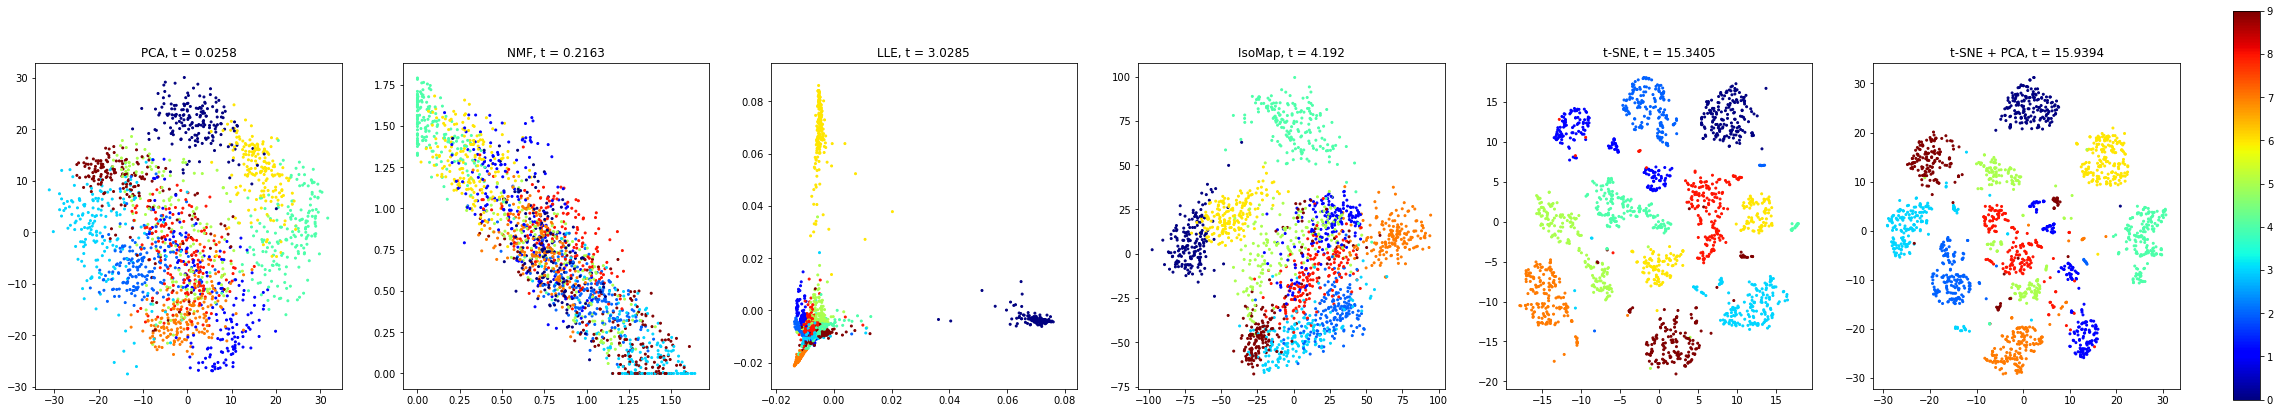

In [151]:
# Now, we plot

y = [y_pca, y_nmf, y_lle, y_iso, y_tsne, y_tsne_pca]
t = [t_pca, t_nmf, t_lle, t_iso, t_tsne, t_tsne_pca]
legend = ["PCA", "NMF", "LLE", "IsoMap", "t-SNE", "t-SNE + PCA"]

N_plots = len(y)

pl.clf()
fig, ax = pl.subplots(nrows=1, ncols=N_plots, figsize=(6 * N_plots + 1, 6))
ax = ax.flatten()
for i in range (N_plots):
    ax[i].scatter(y[i][:,0], y[i][:, 1], c =labels, 
               alpha = 1., s = 4, cmap = pl.cm.jet)
    ax[i].set_title(legend[i] + ", t = " + str(np.round (t[i], 4)))

fig.subplots_adjust(right=0.93)
m = pl.cm.ScalarMappable(cmap=pl.cm.jet)
m.set_array(labels)
cax = fig.add_axes([0.95,0.1,0.01,0.9]) 
fig.colorbar(m, cax=cax)
pl.show()


### Weaknesses of  t-SNE

* Solution depends on initialization
* It generally takes a long time to converge
* Plus general weaknesses of Manifold Learning:
  * Noisy and gappy data 
  * Sensitivity to outliers
  * Tuning parameters
  * Estimation of new dimensionality
  * Reconstruction from the manifold